In [1]:
import statistics
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Sequential version

In [2]:
sequential_results = { "sequential_1e2": _,
                       "sequential_1e4": _,
                       "sequential_1e6": _,
                       "sequential_1e8": _ }

In [3]:
def get_results_from_file(name):
    with open("sequential_log/" + name + ".log", "r") as f:
        results = []
        for line in f:
            results.append(float(line))
    return results

In [4]:
for name in sequential_results:
    sequential_results[name] = get_results_from_file(name)

In [5]:
def get_mean_and_stdev_for_sequential(name):
    result_mean = statistics.mean(sequential_results[name])
    result_stdev = statistics.stdev(sequential_results[name])
    
    return (result_mean, result_stdev)

In [51]:
x = np.array(["1e2", "1e4", "1e6", "1e8"])
y = np.array([])
e = np.array([])
for name in sequential_results:
    result_mean, result_stdev = get_mean_and_stdev_for_sequential(name)
    y = np.append(y, result_mean)
    e = np.append(e, result_stdev)

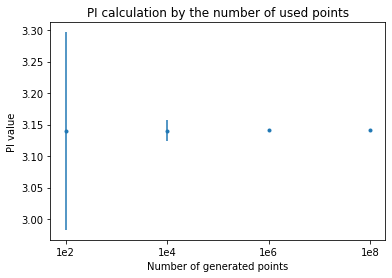

In [59]:
plt.errorbar(x, y, e, linestyle='None', marker='.')
plt.title("PI calculation by the number of used points")
plt.ylabel("PI value")
plt.xlabel("Number of generated points")
plt.show()

In [53]:
list(zip(["1e2", "1e4", "1e6", "1e8"], list(zip(y, e))))

[('1e2', (3.13964, 0.15685558349664852)),
 ('1e4', (3.140516, 0.016026584021412528)),
 ('1e6', (3.141492492, 0.0016330240161655312)),
 ('1e8', (3.14159719, 0.00015813353887178796))]

# Part 2: Parallel version

In [30]:
strong_results_time = { "parallel_strong_1_nodes": _,
                        "parallel_strong_2_nodes": _,
                        "parallel_strong_3_nodes": _,
                        "parallel_strong_4_nodes": _ }

weak_results_time = { "parallel_weak_1_nodes": _,
                      "parallel_weak_2_nodes": _,
                      "parallel_weak_3_nodes": _,
                      "parallel_weak_4_nodes": _ }

In [31]:
def get_strong_results_time_from_file(name):
    with open("parallel_log/strong/" + name + ".log", "r") as f:
        results = []
        for line in f:
            if line.startswith("General"):
                results.append(float(line.split(" ")[1].split("\n")[0]))
    return results

def get_weak_results_time_from_file(name):
    with open("parallel_log/weak/" + name + ".log", "r") as f:
        results = []
        for line in f:
            if line.startswith("General"):
                results.append(float(line.split(" ")[1].split("\n")[0]))
    return results

In [32]:
for name in strong_results_time:
    strong_results_time[name] = get_strong_results_time_from_file(name)

for name in weak_results_time:
    weak_results_time[name] = get_weak_results_time_from_file(name)

In [55]:
x_processors = np.array([1, 2, 3, 4])
y_strong_time = np.array([])
y_weak_time = np.array([])

for name in strong_results_time:
    result_mean = statistics.mean(strong_results_time[name])
    y_strong_time = np.append(y_strong_time, result_mean)

for name in weak_results_time:
    result_mean = statistics.mean(weak_results_time[name])
    y_weak_time = np.append(y_weak_time, result_mean)

### Calculate time

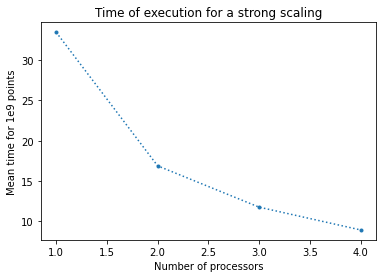

In [65]:
plt.plot(x_processors, y_strong_time, linestyle='dotted', marker='.')
plt.title("Time of execution for a strong scaling")
plt.ylabel("Mean time for 1e9 points")
plt.xlabel("Number of processors")
plt.show()

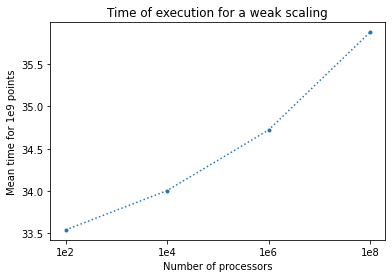

In [66]:
plt.plot(x, y_weak_time, linestyle='dotted', marker='.')
plt.title("Time of execution for a weak scaling")
plt.ylabel("Mean time for 1e9 points")
plt.xlabel("Number of processors")
plt.show()

## Calculate speedup

### Strong scaling

In [69]:
strong_scaling_speedup = list(map(lambda x: 1/(x/y_strong_time[0]), y_strong_time))

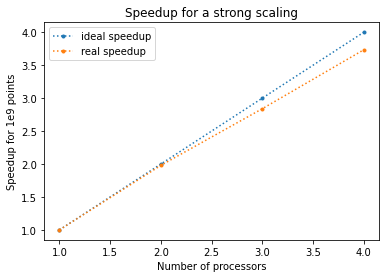

In [97]:
plt.plot([1,2,3,4], [1,2,3,4], linestyle='dotted', marker='.', label='ideal speedup')
plt.plot(x_processors, strong_scaling_speedup, linestyle='dotted', marker='.', label='real speedup')
plt.title("Speedup for a strong scaling")
plt.ylabel("Speedup for 1e9 points")
plt.xlabel("Number of processors")
plt.legend()
plt.show()

### Weak scaling

In [94]:
weak_scaling_speedup = list(map(lambda x: 1/(x/y_weak_time[0]), y_weak_time))
for i in range(4):
    weak_scaling_speedup[i] = weak_scaling_speedup[i]*(i+1)

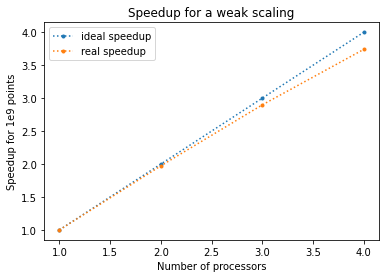

In [98]:
plt.plot([1,2,3,4], [1,2,3,4], linestyle='dotted', marker='.', label='ideal speedup')
plt.plot(x_processors, weak_scaling_speedup, linestyle='dotted', marker='.', label='real speedup')
plt.title("Speedup for a weak scaling")
plt.ylabel("Speedup for 1e9 points")
plt.xlabel("Number of processors")
plt.legend()
plt.show()

# Report [PL]

Pomiary zostały zebrane 30 marca 2021r.<br>
Zebrane one zostały na mojej prywatnej stacji, z racji tego że środowisko vCluster nie było responsywne (pobranie kodu z gita zajmowało koło pół godziny, a wszelskie operacje na plikach (edycja oraz uruchamianie) zajmowało koło dziesięciu minut.<br>
Kod źródłowy: https://github.com/Mlokos/ParallelProgramming/tree/master/lab2

## Wersja sekwencyjna

Wraz ze zwiększaniem liczby losowanych punktów rosła dokładność obliczeń liczby PI. <br>
Odchylenie standardowe zmniejszało się wraz z pierwiastkiem ilości losowanych punktów (0.16 dla 1e2, 0.016 dla 1e4)

## Wersja równoległa

Dla silnego skalowania można zaobserwować typowe przyspieszenie dla problemu silnie skalowalnego - wraz ze wzrostem liczby użytych procesorów rosło przyspieszenie. <br>
Dla ilości procesorów większej od dwóch można również zauważyć że aktualne przyspieszenie maleje względem idealnego - może to wynikać przez część sekwencyjną oraz przez komunikację z innymi node'ami.<br>
Dla słabego skalowania można zauważyć takie samo zachowanie jak dla silnego.